In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = sp.symbols('x')

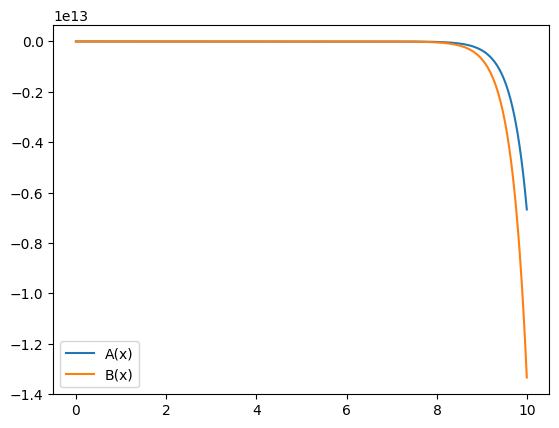

In [ ]:
def dydx(x,y):
  return np.array([y[0]+y[1], -2*y[0] + 4*y[1]])

def EM(x0, xf, y0, N):

  dx = (xf - x0)/N

  x_val = []
  A_val = []
  B_val = []

  for i in range(0,N):
    x_val.append(x0)
    A_val.append(y0[0])
    B_val.append(y0[1])


    y0 += dx*dydx(x0,y0)
    x0 += dx

  return x_val, A_val, B_val

x0 = 0
xf = 10
y0 = [1,0]
N = 1000

x_v, A_v, B_v = EM(x0,xf,y0,N)

plt.plot(x_v, A_v, label='A(x)')
plt.plot(x_v, B_v, label='B(x)')
plt.legend()

In [ ]:
A = sp.Function('A')
B = sp.Function('B')
dA = sp.diff(A(x),x)
dB = sp.diff(B(x),x)

expA = dA - A(x) - B(x)
expB = dB + 2*A(x) - 4*B(x)

display(expA)
display(expB)

#Substitute 'B' from expA to 'B' in expB:
exp1 = sp.solve(expA, B(x))    #[...] exp1[0]
#display(exp1[0])

exp2 = expB.subs(B(x), exp1[0])
display(exp2.simplify())

sol1 = sp.dsolve(exp2.simplify(), A(x))
display(sol1)

sol2 = exp1[0].subs(A(x), sol1.rhs)

display(sp.Eq(B(x),sol2.simplify()))

-A(x) - B(x) + Derivative(A(x), x)

2*A(x) - 4*B(x) + Derivative(B(x), x)

6*A(x) - 5*Derivative(A(x), x) + Derivative(A(x), (x, 2))

Eq(A(x), (C1 + C2*exp(x))*exp(2*x))

Eq(B(x), C2*exp(3*x) + (C1 + C2*exp(x))*exp(2*x))

Eq(A(x), (2 - exp(x))*exp(2*x))

Eq(B(x), 2*(2 - exp(x))*exp(2*x) + (exp(x) - 2)*exp(2*x) - exp(3*x))

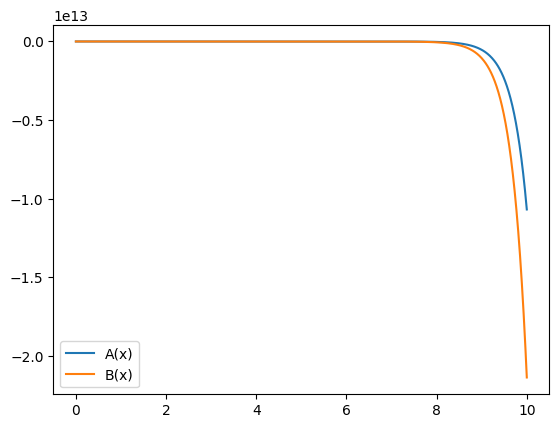

In [ ]:
sol3 = sp.dsolve(exp2.simplify(), A(x), ics={A(0):1, dA.subs(x,0):1})
display(sol3)

sol4 = exp1[0].subs(A(x), sol3.rhs)

display(sp.Eq(B(x),sol4.simplify()))

Al = sp.lambdify(x, sol3.rhs)
Bl = sp.lambdify(x, sol4.simplify())
x_v = np.linspace(0, 10, 1000)

plt.plot(x_v, Al(x_v), label='A(x)')
plt.plot(x_v, Bl(x_v), label='B(x)')
plt.legend()
